<a href="https://colab.research.google.com/github/AliVaghjipur/DeepNeuralNetwork/blob/main/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn import datasets

In [ ]:
np.random.seed(0)

In [ ]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)    #random_state is some random state number (123) remains constant so that our dataset doesnt keep on changing everytime. Noise defines the variance between blues and reds. Factor is the ratio of smaller circle size to larger circle, 0.2 means dia of small circle is 20% of the dia of larger circle.


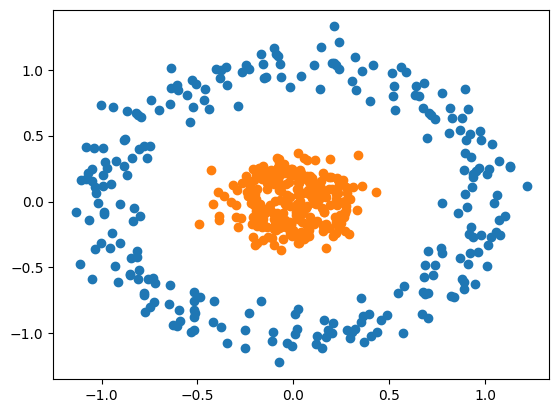

In [ ]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))   #4 nodes in the hidden layer, input_shape is number of nodes in the input layer
model.add(Dense(1, activation='sigmoid'))   #Dense connects each node to every other node in the previous layer
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
h = model.fit(x=X, y=y, verbose = 1, batch_size = 20, epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.5680
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4400
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5720
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.6260
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5520
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4460
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5600
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.3880
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.6500
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.6060
Epoch 11/

Text(0.5, 1.0, 'accuracy')

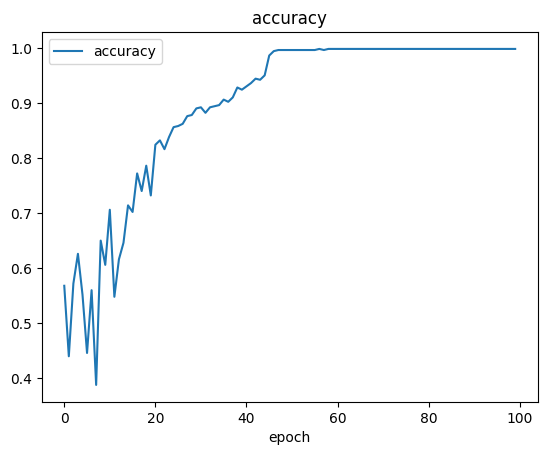

In [ ]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

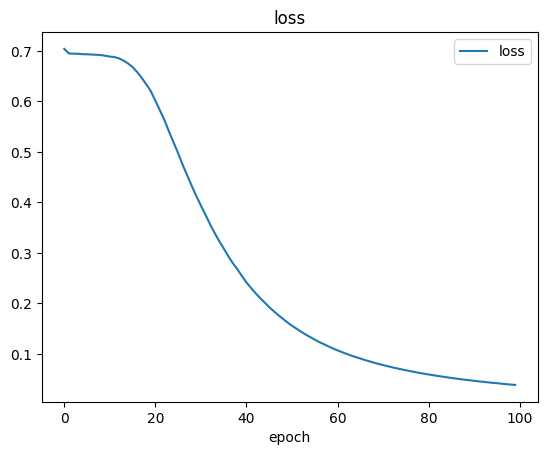

In [ ]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [ ]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)  #-1 and +1 are tolerances
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 912us/step


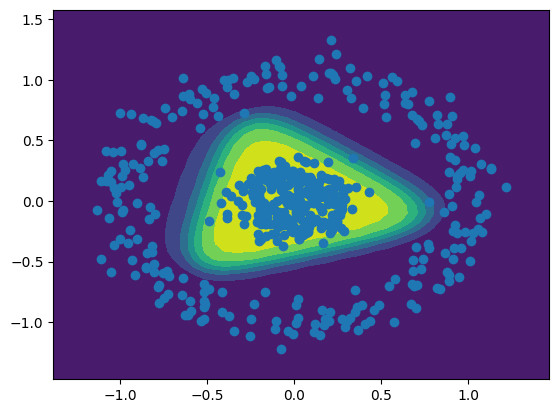

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 18ms/step
Prediction is:  [[0.12876585]]


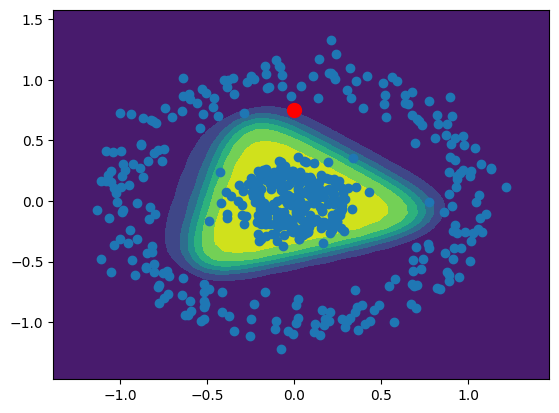

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0
y = 0.75
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("Prediction is: ", prediction)